# 코랩

In [ ]:
# 런타임 다시시작을 해야 한글폰트가 적용 됩니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumBarunGothic')

#그래프의 폰트를 선명하게 출력합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

<ipython-input-1-56c9973c6844>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# VS Code

In [1]:
#패키지를 불러옵니다.
import matplotlib as mpl
import platform

#주피터 노트북내에 그림을 표시 합니다.
%matplotlib inline

my_platform = platform.system()
# 폰트 설정
if my_platform == 'Linux':
  mpl.rc('font', family='NanumBarunGothic')
elif my_platform == 'Windows':
  mpl.rc('font', family='Malgun Gothic')
elif my_platform == 'Darwin':
  mpl.rc('font', family='AppleGothic')

#그래프의 폰트를 선명하게 출력합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

<ipython-input-1-513f90685f67>:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# 진행

In [43]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/%40preprocessing_data_member01.csv', index_col = 0)
df.head()

,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,총할인금액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,100304734@n,1.0,0.0,0.0,0.0,1.0,0.0,1,103300,0,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1003409866@k,62.0,0.0,0.0,0.0,1.0,0.0,18,4303880,379040,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,100381931@n,5.0,0.0,0.0,0.0,0.0,1.0,3,71050,15000,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,1004498382@k,1.0,0.0,0.0,0.0,1.0,0.0,1,76400,14500,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,1004547839@k,4.0,1.0,0.0,0.0,0.0,0.0,1,360800,53400,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday


In [3]:
df.columns

Index(['ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율', '용기류구매비율', '위생용품구매비율',
       '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이', '사용가능 적립금', '성별', '최종접속일',
       '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '지역', '세부지역', '주소',
       '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자', '최종주문요일', '최종주문시간',
       '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

<Axes: ylabel='최종주문요일'>

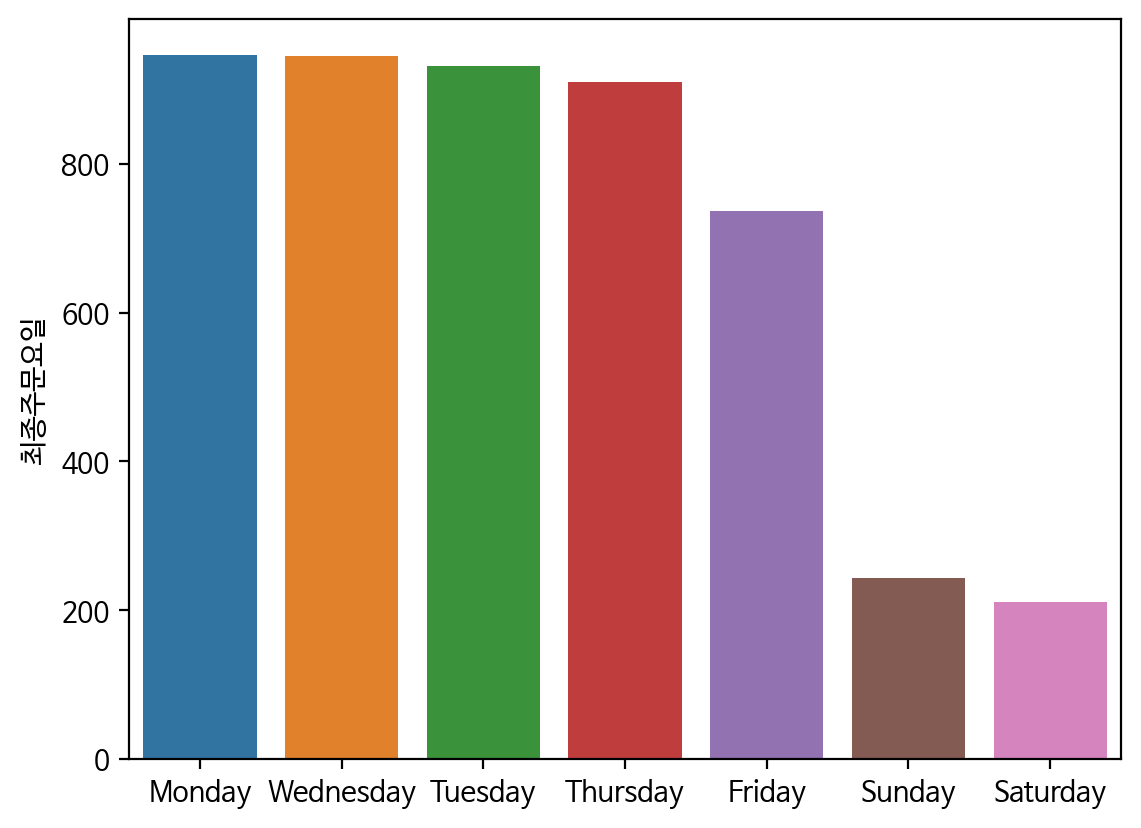

In [39]:
# 1. '최종주문요일'에 대한 주문횟수 시각화(마지막으로 주문한 각 요일의 횟수)
import seaborn as sns
q1 = df['최종주문요일'].value_counts().to_frame()
sns.barplot(data=q1, x=q1.index, y='최종주문요일')

<Axes: xlabel='최종주문요일', ylabel='count'>

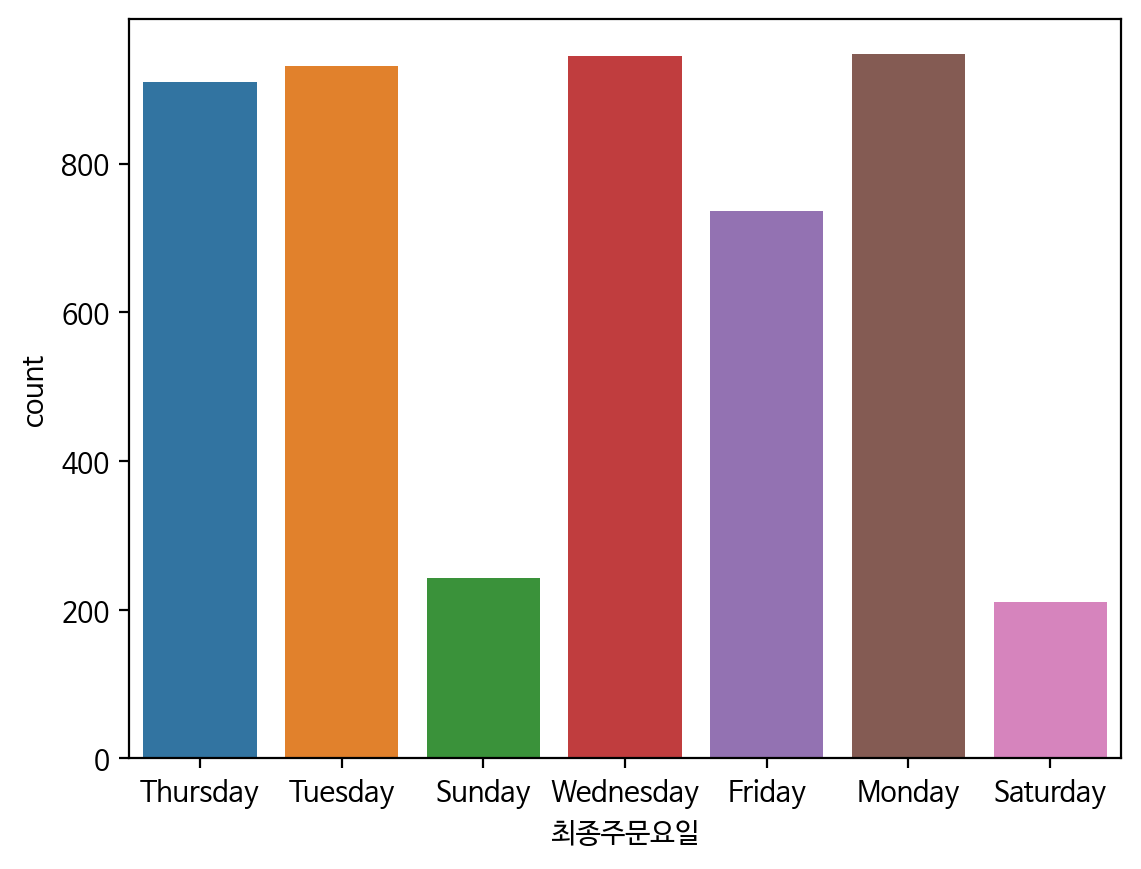

In [37]:
sns.countplot(x=df["최종주문요일"])

<BarContainer object of 7 artists>

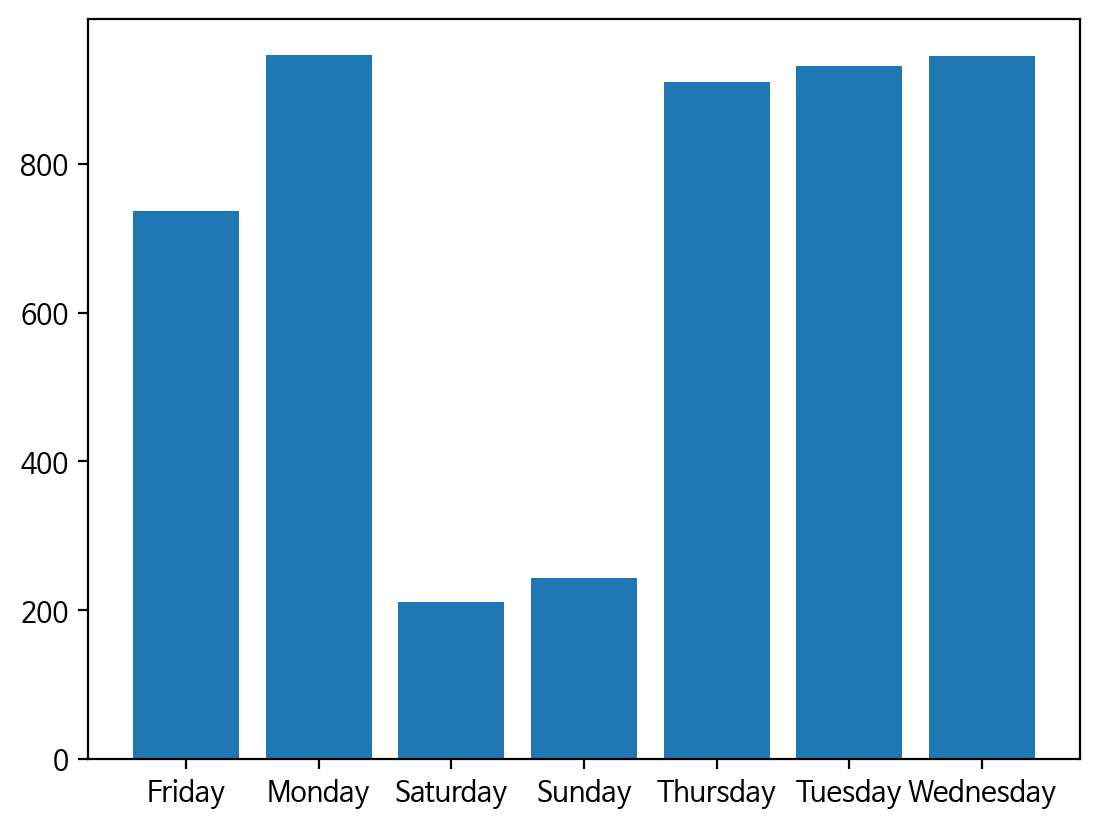

In [21]:
import matplotlib.pyplot as plt
d1 = df[['최종주문요일','총구매횟수']].groupby('최종주문요일').count().sort_values('최종주문요일')
plt.bar(d1.index, d1['총구매횟수'])

<Axes: xlabel='최종주문요일', ylabel='user_count'>

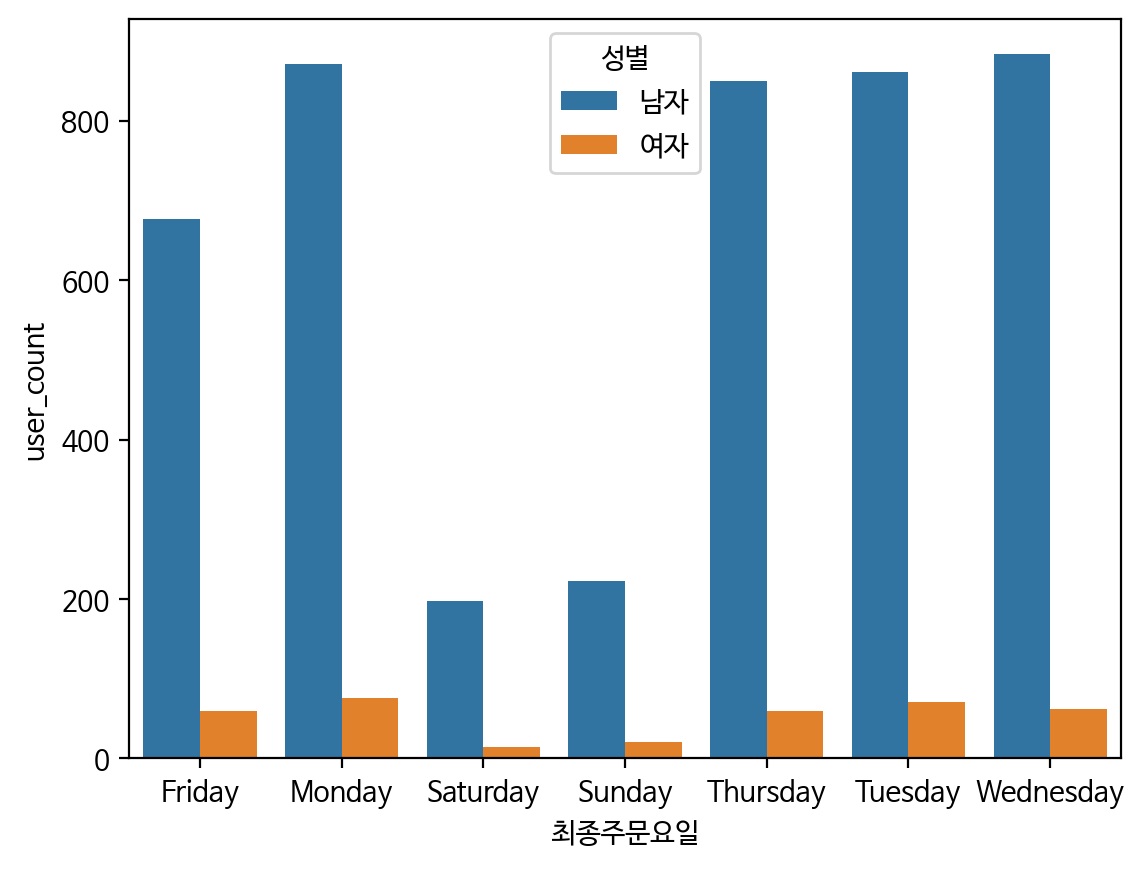

In [36]:
# 2. 성별에 따른 '최종주문요일'에 대한 횟수 시각화(마지막으로 주문한 요일의 횟수)
q1 = df[['성별','최종주문요일','ID']].groupby(['성별', '최종주문요일'], as_index = False).count()
q1.rename(columns = {'ID' : 'user_count'}, inplace = True)
sns.barplot(data=q1, x="최종주문요일", y="user_count", hue="성별")

In [44]:
# 3. '최종주문일자'와 '가입월' 데이터 분포 시각화
import plotly.express as px
fig = px.histogram(df, x="최종주문일자")
fig.show()

In [45]:
fig = px.histogram(df, x="가입월")
fig.show()

<Axes: xlabel='최종주문월', ylabel='총순수이익'>

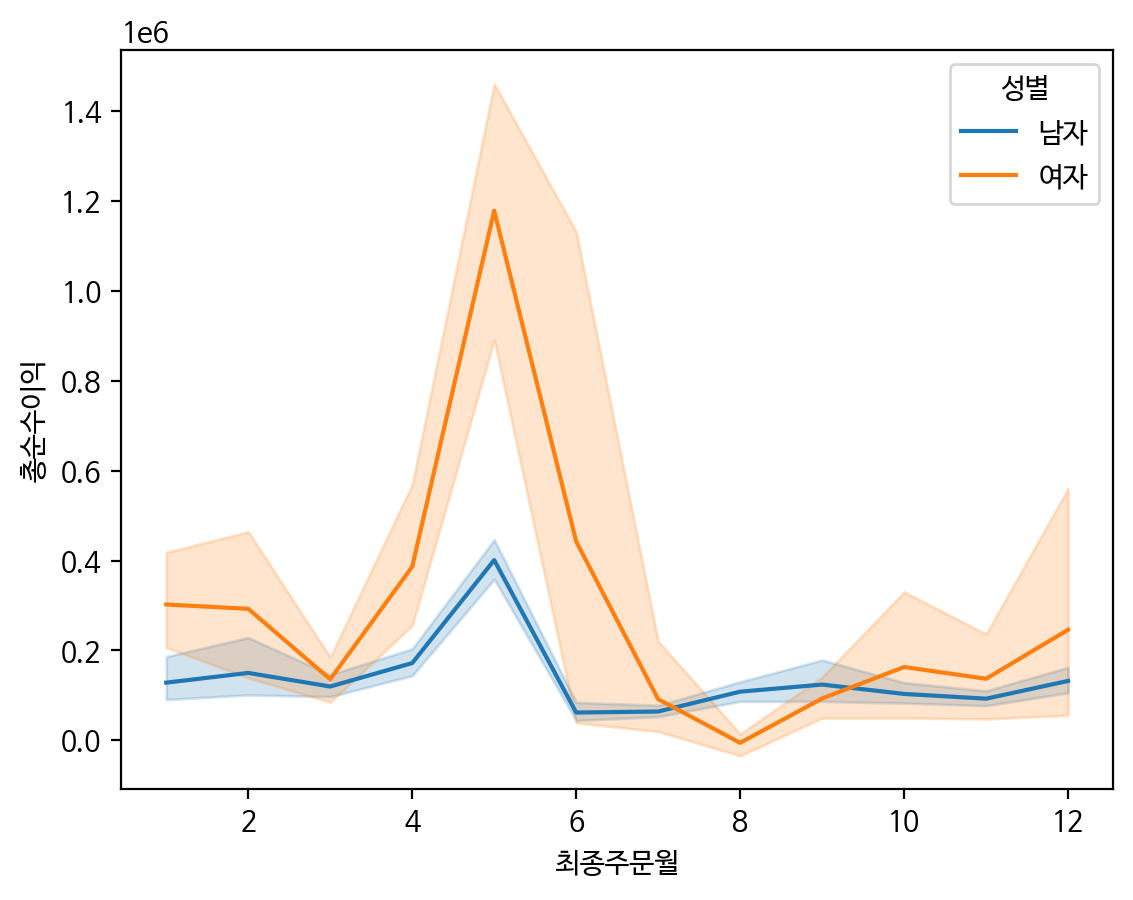

In [48]:
# 4. 성별에 따른 '최종주문월'에 대한 '총순수이익' 시각화
sns.lineplot(data=df, x="최종주문월", y="총순수이익", hue="성별")

<Axes: xlabel='최종주문월', ylabel='총순수이익'>

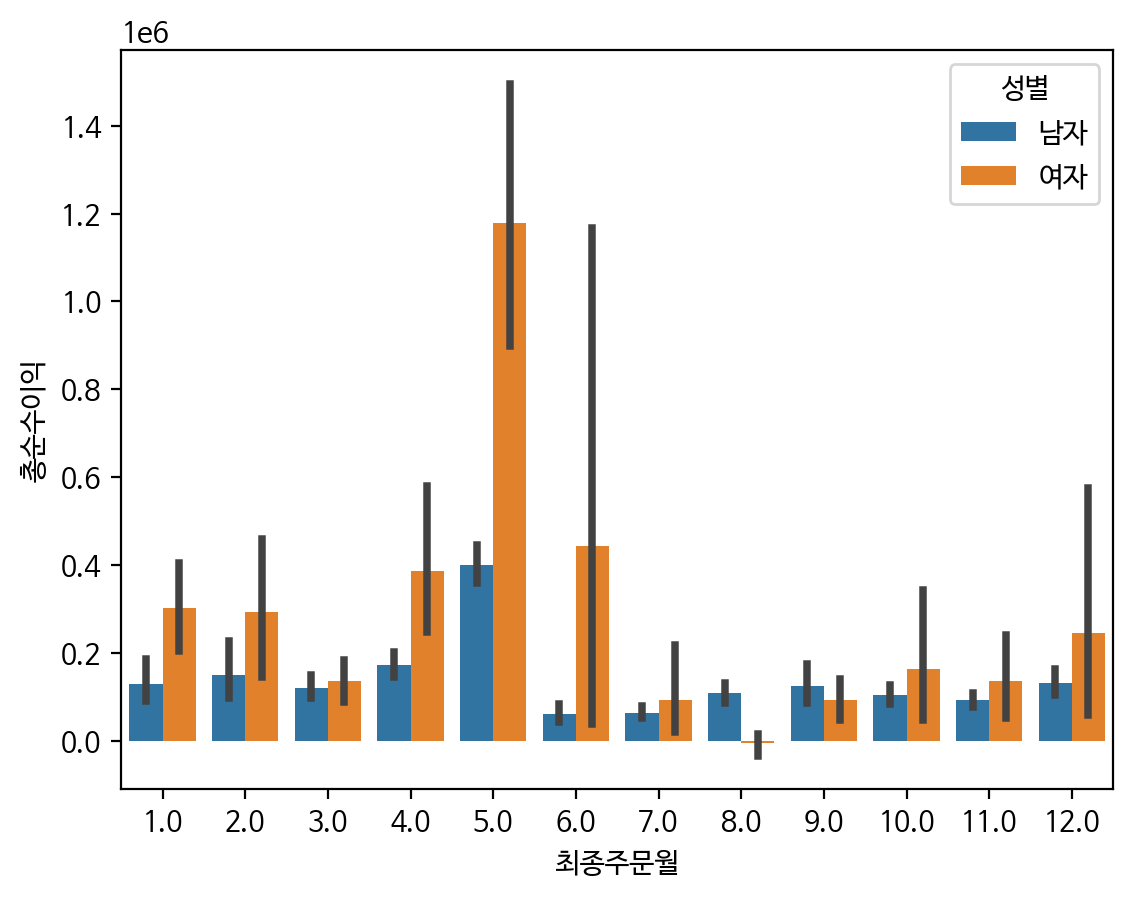

In [49]:
sns.barplot(data=df, x="최종주문월", y="총순수이익", hue="성별")

In [52]:
# 5. 성별에 따른 나이 분포 시각화
df[['성별', '나이']]
# 바이올린

# 히스토그램

,성별,나이
0,남자,47.0
1,남자,27.0
2,남자,41.0
3,남자,47.0
4,남자,47.0
...,...,...
4931,남자,45.0
4932,남자,32.0
4933,여자,40.0
4934,남자,45.0


In [54]:
import plotly.express as px
fig = px.violin(df, y="나이", color="성별")
fig.show()

<Axes: xlabel='유입경로', ylabel='총판매액'>

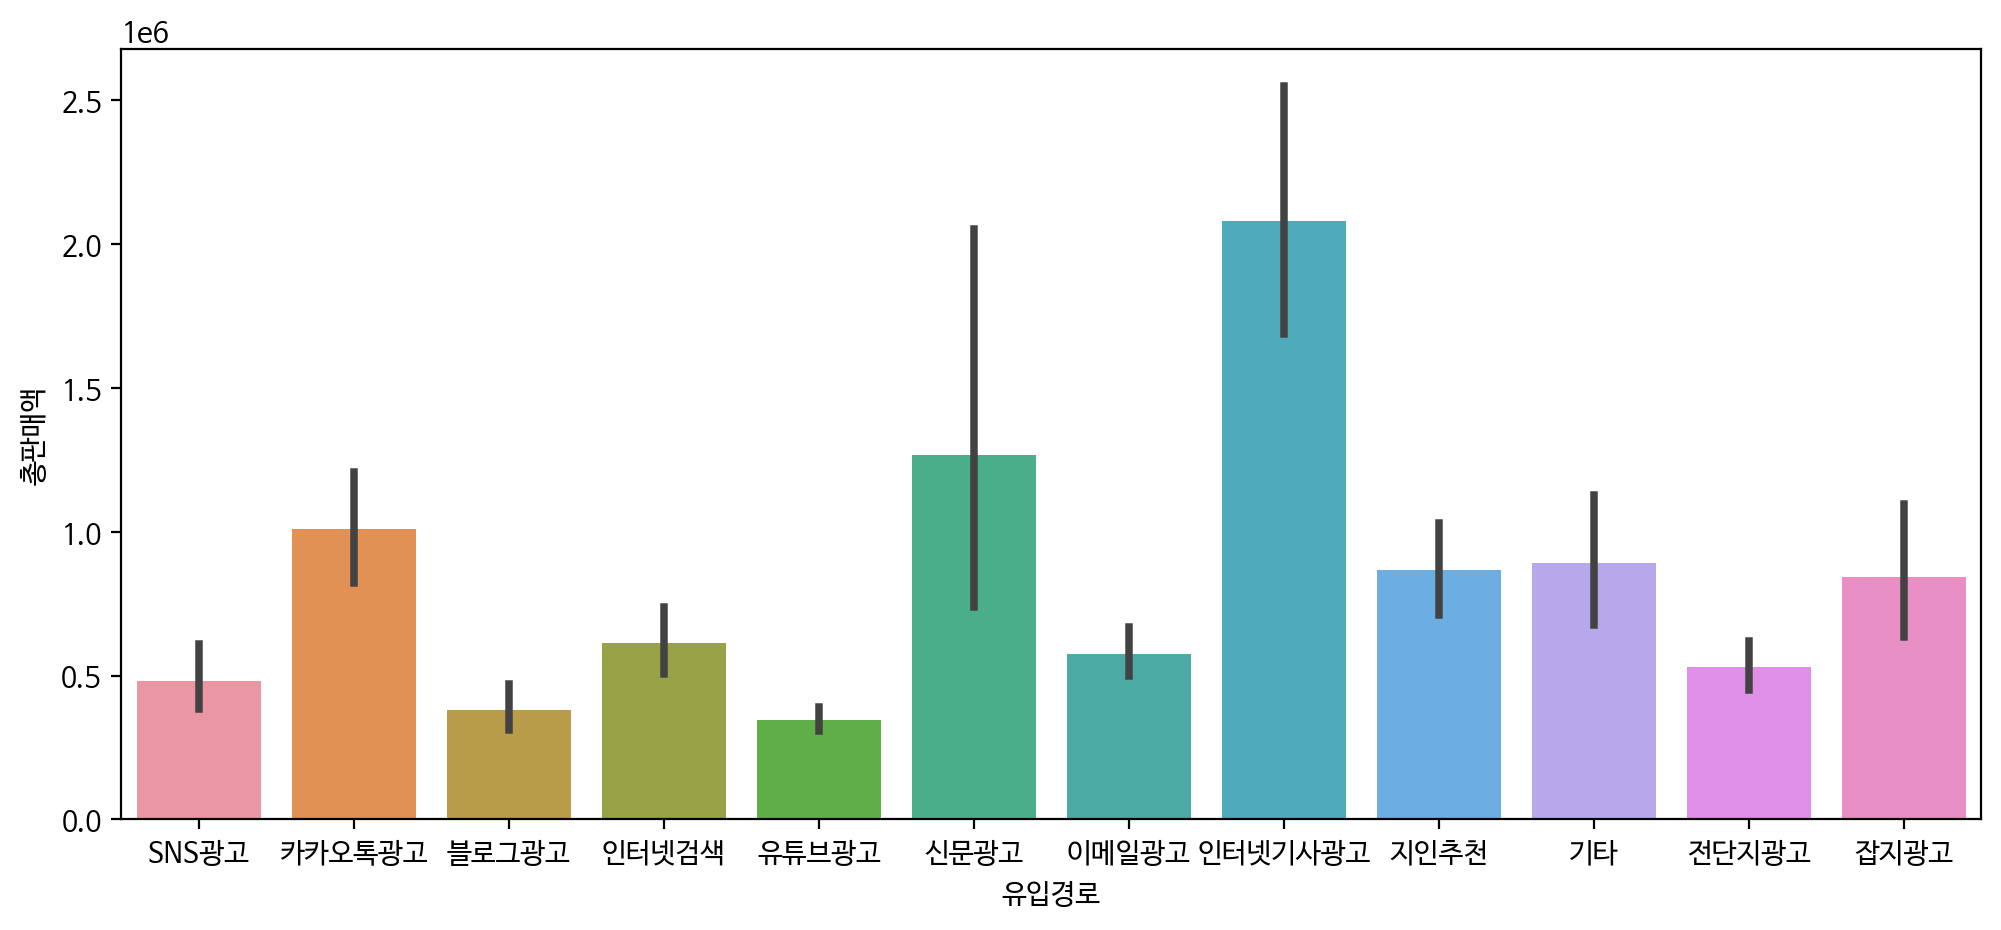

In [57]:
# 6. '유입경로'별 '총판매액' 비교
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = '유입경로', y = '총판매액')